In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
import pickle
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
bmw = pd.read_csv("bmw_pricing_challenge.csv")

In [6]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01-01-2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,01-02-2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,01-02-2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,01-02-2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,01-04-2018


In [7]:
bmw.shape

(4843, 18)

In [8]:
bmw.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [9]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [10]:
#Check for null values
bmw.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

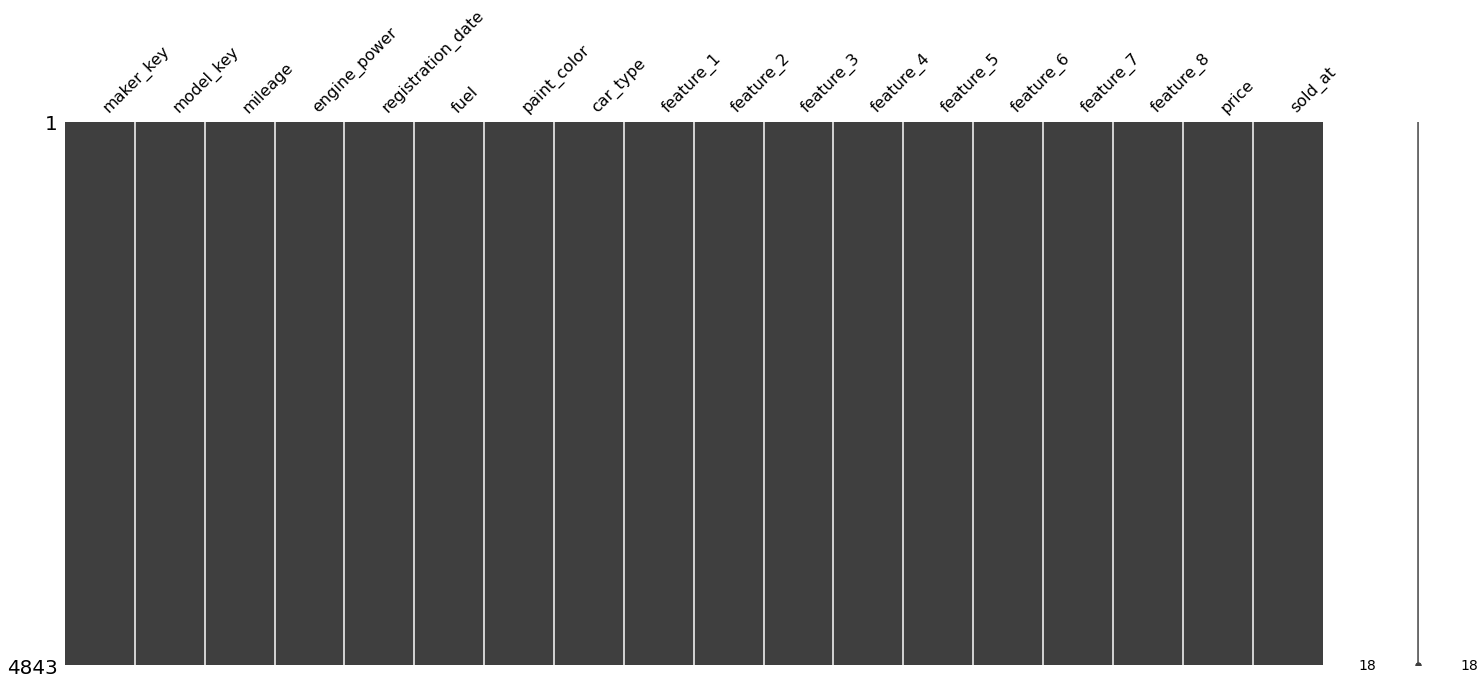

In [11]:
msn.matrix(bmw)
plt.show()

In [12]:
bmw.model_key.unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       '225 Active Tourer', '214 Gran Tourer'], dtype=object)

In [13]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [14]:
bmw.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

## Converting Dates into int types

In [15]:
bmw.registration_date.head()

0    01-02-2012
1    01-04-2016
2    01-04-2012
3    01-07-2014
4    01-12-2014
Name: registration_date, dtype: object

In [16]:
bmw['Registration_day'] = pd.to_datetime(bmw.registration_date, format="%d-%m-%Y").dt.day
bmw['Registration_month'] = pd.to_datetime(bmw.registration_date, format="%d-%m-%Y").dt.month
bmw['Registration_year'] = pd.to_datetime(bmw.registration_date, format="%d-%m-%Y").dt.year

In [17]:
bmw['Sold_day'] = pd.to_datetime(bmw.sold_at, format="%d-%m-%Y").dt.day
bmw['Sold_month'] = pd.to_datetime(bmw.sold_at, format="%d-%m-%Y").dt.month
bmw['Sold_year'] = pd.to_datetime(bmw.sold_at, format="%d-%m-%Y").dt.year

In [18]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_7,feature_8,price,sold_at,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,...,True,False,11300,01-01-2018,1,2,2012,1,1,2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,...,True,True,69700,01-02-2018,1,4,2016,1,2,2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,...,True,False,10200,01-02-2018,1,4,2012,1,2,2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,...,True,True,25100,01-02-2018,1,7,2014,1,2,2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,...,True,True,33400,01-04-2018,1,12,2014,1,4,2018


In [19]:
bmw.dtypes

maker_key             object
model_key             object
mileage                int64
engine_power           int64
registration_date     object
fuel                  object
paint_color           object
car_type              object
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
price                  int64
sold_at               object
Registration_day       int64
Registration_month     int64
Registration_year      int64
Sold_day               int64
Sold_month             int64
Sold_year              int64
dtype: object

In [20]:
bmw.shape

(4843, 24)

In [21]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at', 'Registration_day',
       'Registration_month', 'Registration_year', 'Sold_day', 'Sold_month',
       'Sold_year'],
      dtype='object')

In [22]:
bmw['reg_sold_age'] =  pd.to_datetime(bmw.sold_at) - pd.to_datetime(bmw.registration_date)
bmw['reg_sold_age'] = bmw.reg_sold_age.apply(lambda x: int(str(x).split()[0]))

In [23]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_8,price,sold_at,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,...,False,11300,01-01-2018,1,2,2012,1,1,2018,2191
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,...,True,69700,01-02-2018,1,4,2016,1,2,2018,729
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,...,False,10200,01-02-2018,1,4,2012,1,2,2018,2190
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,...,True,25100,01-02-2018,1,7,2014,1,2,2018,1456
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,...,True,33400,01-04-2018,1,12,2014,1,4,2018,1453


In [24]:
bmw.shape

(4843, 25)

In [25]:
bmw.drop(['registration_date','sold_at'], axis=1, inplace=True)

## Encoding Features

In [26]:
categorical_features = bmw.select_dtypes(['object']).columns
print(categorical_features)

Index(['maker_key', 'model_key', 'fuel', 'paint_color', 'car_type'], dtype='object')


In [27]:
bmw.model_key.value_counts()

320    752
520    633
318    569
X3     438
116    358
      ... 
635      1
225      1
630      1
735      1
i8       1
Name: model_key, Length: 75, dtype: int64

### 1. Fuel Type

In [28]:
fuel_list = []
fuel_listm = []
for f in bmw.fuel.unique():
    fuel_list.append(bmw[bmw.fuel==f]['price'].mean())
    fuel_listm.append(bmw[bmw.fuel==f]['price'].median())
    
print(dict(zip(bmw.fuel.unique(), fuel_list)))
print(dict(zip(bmw.fuel.unique(), fuel_listm)))

{'diesel': 15846.110751993105, 'petrol': 14398.429319371728, 'hybrid_petrol': 37575.0, 'electro': 20966.666666666668}
{'diesel': 14300.0, 'petrol': 11900.0, 'hybrid_petrol': 25000.0, 'electro': 20900.0}


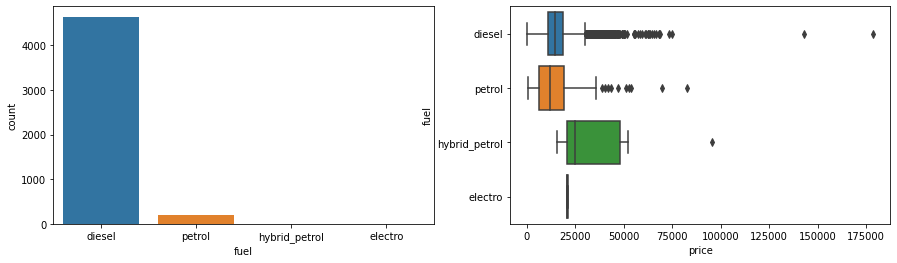

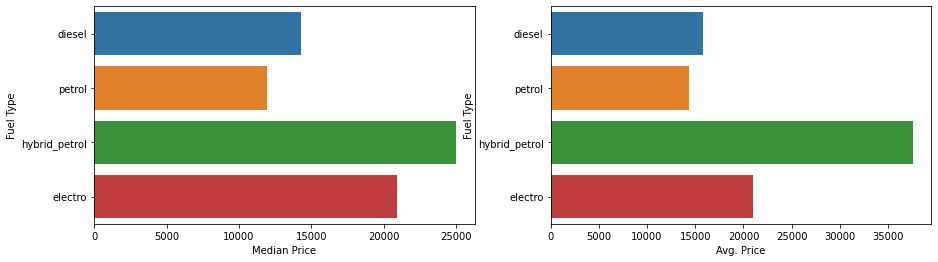

In [29]:
### plot frequency of each of the fuel types and five point summary on price for each fuel type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(bmw.fuel, ax = ax[0])
sns.boxplot(x ='price',y = 'fuel', data = bmw, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each fuel type
fuel_PU = []
for each in bmw.fuel.unique():
    x = bmw[bmw.fuel==each]
    fuel_PU.append(np.median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.barplot(fuel_PU, bmw.fuel.unique(), ax = ax[0])
ax[0].set_xlabel('Median Price')
ax[0].set_ylabel('Fuel Type')

fuel_PU = []
for each in bmw.fuel.unique():
    x = bmw[bmw.fuel==each]
    fuel_PU.append(np.mean(x['price']))

sns.barplot(fuel_PU, bmw.fuel.unique(), ax = ax[1])
ax[1].set_xlabel('Avg. Price')
ax[1].set_ylabel('Fuel Type')

plt.show()

- Observations:
    - Median price of hybrid-petrol cars are highest amongst all types, while petrol cars have lowest median price. If median is to be considered as deciding metric then, order of weightage for each fuel types follows:
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Average price for each fuel type suggest weightage as: 
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Negligible outliers impact on price by fuel type
    - Hence, fuel can be lacoded with the weightage assignment as follows:
     - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}

In [30]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_7,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age
0,BMW,118,140411,100,diesel,black,convertible,True,True,False,...,True,False,11300,1,2,2012,1,1,2018,2191
1,BMW,M4,13929,317,petrol,grey,convertible,True,True,False,...,True,True,69700,1,4,2016,1,2,2018,729
2,BMW,320,183297,120,diesel,white,convertible,False,False,False,...,True,False,10200,1,4,2012,1,2,2018,2190
3,BMW,420,128035,135,diesel,red,convertible,True,True,False,...,True,True,25100,1,7,2014,1,2,2018,1456
4,BMW,425,97097,160,diesel,silver,convertible,True,True,False,...,True,True,33400,1,12,2014,1,4,2018,1453


In [31]:
bmw.fuel = bmw.fuel.map({'diesel': 2, 'petrol': 1, 'electro' : 3,  'hybrid_petrol' : 4})

In [32]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_7,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age
0,BMW,118,140411,100,2,black,convertible,True,True,False,...,True,False,11300,1,2,2012,1,1,2018,2191
1,BMW,M4,13929,317,1,grey,convertible,True,True,False,...,True,True,69700,1,4,2016,1,2,2018,729
2,BMW,320,183297,120,2,white,convertible,False,False,False,...,True,False,10200,1,4,2012,1,2,2018,2190
3,BMW,420,128035,135,2,red,convertible,True,True,False,...,True,True,25100,1,7,2014,1,2,2018,1456
4,BMW,425,97097,160,2,silver,convertible,True,True,False,...,True,True,33400,1,12,2014,1,4,2018,1453


### 2. Paint color

In [33]:
color_list = []
color_listm = []
for f in bmw.paint_color.unique():
    color_list.append(bmw[bmw.paint_color== f]['price'].mean())
    color_listm.append(bmw[bmw.paint_color == f]['price'].median())
    
print(dict(zip(bmw.paint_color.unique(), color_list)))
print(dict(zip(bmw.paint_color.unique(), color_listm)))

{'black': 16173.85180649112, 'grey': 15595.744680851063, 'white': 17328.438661710035, 'red': 16500.0, 'silver': 14816.109422492402, 'blue': 15114.929577464789, 'orange': 18866.666666666668, 'beige': 15817.073170731708, 'brown': 15367.741935483871, 'green': 7200.0}
{'black': 14500.0, 'grey': 14000.0, 'white': 14900.0, 'red': 13200.0, 'silver': 14400.0, 'blue': 13250.0, 'orange': 17400.0, 'beige': 13700.0, 'brown': 13900.0, 'green': 6950.0}


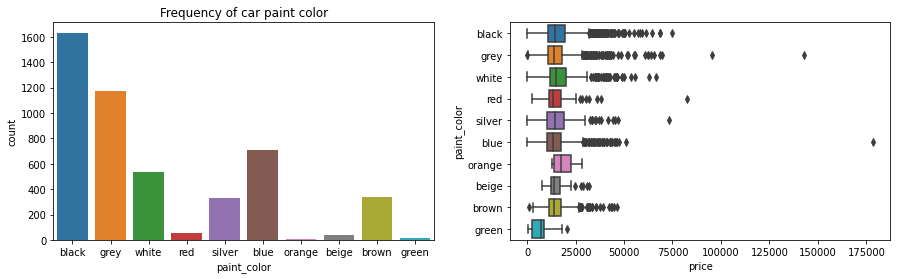

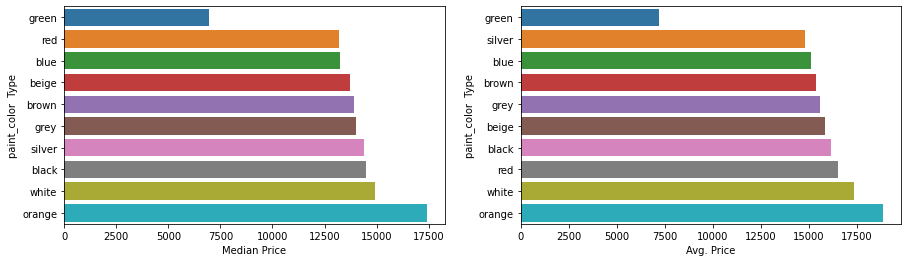

In [34]:
### plot frequency of each of the paint_color and five point summary on price for each paint_color  type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(bmw.paint_color , ax = ax[0]).set_title('Frequency of car paint color')
sns.boxplot(x ='price',y = 'paint_color', data = bmw, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each paint_color  type
paint_color_PU = []
for each in bmw.paint_color .unique():
    x = bmw[bmw.paint_color ==each]
    paint_color_PU.append(np.median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4)) 
sns.barplot(sorted(paint_color_PU), bmw.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[0])
ax[0].set_xlabel('Median Price')
ax[0].set_ylabel('paint_color  Type')

paint_color_PU = []
for each in bmw.paint_color .unique():
    x = bmw[bmw.paint_color ==each]
    paint_color_PU.append(np.mean(x['price']))

sns.barplot(sorted(paint_color_PU), bmw.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[1])
ax[1].set_xlabel('Avg. Price')
ax[1].set_ylabel('paint_color  Type')

plt.show()

In [35]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_7,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age
0,BMW,118,140411,100,2,black,convertible,True,True,False,...,True,False,11300,1,2,2012,1,1,2018,2191
1,BMW,M4,13929,317,1,grey,convertible,True,True,False,...,True,True,69700,1,4,2016,1,2,2018,729
2,BMW,320,183297,120,2,white,convertible,False,False,False,...,True,False,10200,1,4,2012,1,2,2018,2190
3,BMW,420,128035,135,2,red,convertible,True,True,False,...,True,True,25100,1,7,2014,1,2,2018,1456
4,BMW,425,97097,160,2,silver,convertible,True,True,False,...,True,True,33400,1,12,2014,1,4,2018,1453


In [36]:
bmw.paint_color.value_counts()

black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: paint_color, dtype: int64

In [37]:
paint_col_each= [np.mean(bmw[bmw.paint_color==each]['price']) for each in bmw.paint_color.unique()]
# dummy dataframe
x = pd.DataFrame(bmw.paint_color.unique(), columns=['paint_color'])
x['total_avgPrice']  = bmw['price'].mean()
x['avgPrice_by_color'] = paint_col_each
x['diff_avgPrice'] = (x.total_avgPrice - x.avgPrice_by_color)/x.total_avgPrice*100
x.sort_values('diff_avgPrice')

,paint_color,total_avgPrice,avgPrice_by_color,diff_avgPrice
6,orange,15828.081767,18866.666667,-19.197430
2,white,15828.081767,17328.438662,-9.479082
3,red,15828.081767,16500.000000,-4.245102
0,black,15828.081767,16173.851806,-2.184535
7,beige,15828.081767,15817.073171,0.069551
1,grey,15828.081767,15595.744681,1.467879
8,brown,15828.081767,15367.741935,2.908374
5,blue,15828.081767,15114.929577,4.505614
4,silver,15828.081767,14816.109422,6.393525
9,green,15828.081767,7200.000000,54.511228


- Observations:
    - Orange cars have almost same median and average price and highest amost all.
    - Green cars have least median and average price.
    - Other colors of the cars median and average prices are changing in order.
    - All the cars paint colors except orange, white, silver and green, average price is within 5% of the total price.
 - following the observations below weightage can be used for label encoding
        - orange -> 5
        - white -> 4
        - remaing -> 3
        - silver -> 2
        - green -> 1


In [38]:
bmw['paint_color'] = bmw.paint_color.apply(lambda x : 5 if x == 'orange' else (
4 if x == 'white' else (
2 if x == 'silver' else (
1 if x == 'green' else 3))))

In [39]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_7,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age
0,BMW,118,140411,100,2,3,convertible,True,True,False,...,True,False,11300,1,2,2012,1,1,2018,2191
1,BMW,M4,13929,317,1,3,convertible,True,True,False,...,True,True,69700,1,4,2016,1,2,2018,729
2,BMW,320,183297,120,2,4,convertible,False,False,False,...,True,False,10200,1,4,2012,1,2,2018,2190
3,BMW,420,128035,135,2,3,convertible,True,True,False,...,True,True,25100,1,7,2014,1,2,2018,1456
4,BMW,425,97097,160,2,2,convertible,True,True,False,...,True,True,33400,1,12,2014,1,4,2018,1453


### 3. Model key

75


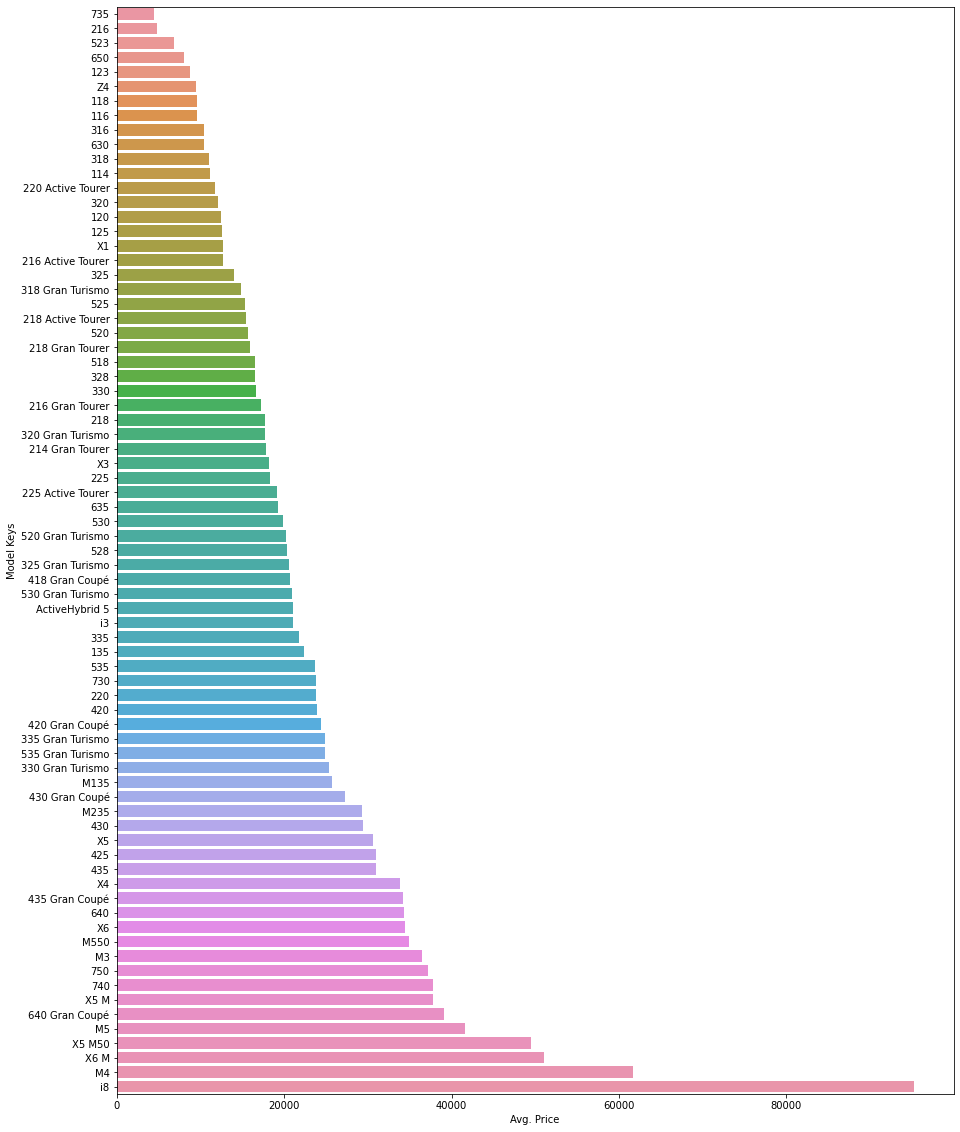

In [40]:
model_key_PU = []
for each in bmw.model_key.unique():
    x = bmw[bmw.model_key==each]
    model_key_PU.append(np.mean(x['price']))
    
print(len(model_key_PU)    )
plt.figure(figsize = (15,20))
x = pd.concat([pd.DataFrame(bmw.model_key.unique(), columns=['Key']), pd.DataFrame(model_key_PU,columns=['value'])], axis = 1).sort_values('value')
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Avg. Price')
plt.ylabel('Model Keys')
plt.show()

### 4.Capturing interraction effects between features

Text(0, 0.5, 'Model Key')

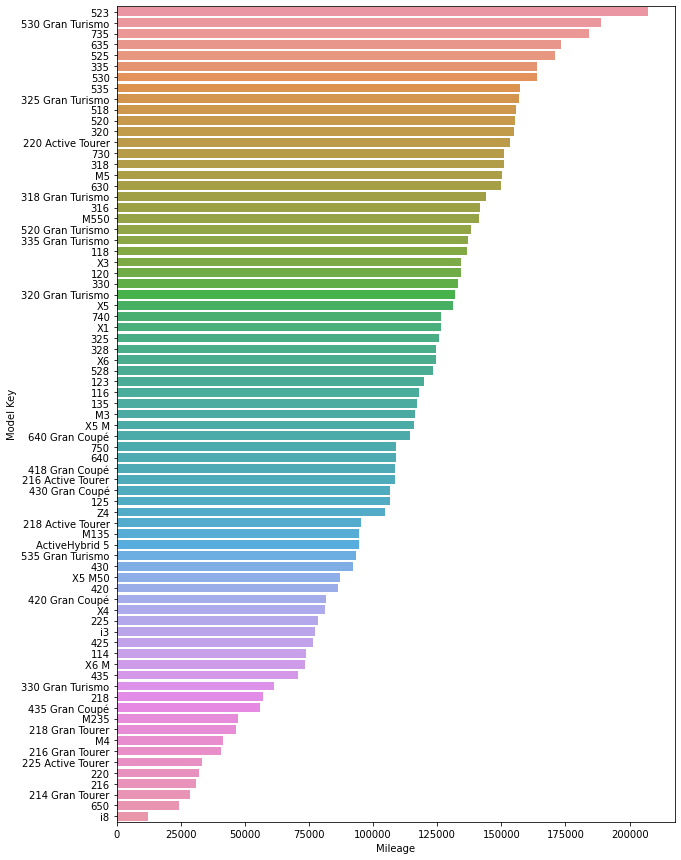

In [41]:
### relation between model_key and mileage
mileage_N = []
for each in bmw.model_key.unique():
    x = bmw[bmw.model_key==each]
    mileage_N.append(sum(x['mileage'])/len(x))
    
x = pd.concat([pd.DataFrame(bmw.model_key.unique(), columns=['Key']), pd.DataFrame(mileage_N,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,15))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Mileage')
plt.ylabel('Model Key')

In [42]:
bmw['model_key_mileage_rel'] = bmw.model_key.apply(lambda x : 5 if x == '523' else (
4 if x in ('530 Gran Turismo', '735', '635', '525', '335', '530') else (
3 if x in ('535', '325 Gran Turismo', '518', '520', '320',
       '220 Active Tourer', '730', '318', 'M5', '630', '318 Gran Turismo',
       '316', 'M550', '520 Gran Turismo', '335 Gran Turismo', '118', 'X3',
       '120', '330', '320 Gran Turismo', 'X5') else (
2 if x in ('X1', '740', '325', '328',
       'X6', '528', '640 Gran Coupé', '123', '116', '135', 'M3', 'X5 M',
       '750', '640', '418 Gran Coupé', '216 Active Tourer',
       '430 Gran Coupé', '125', 'Z4') else (
1)))))

### 5. Car type

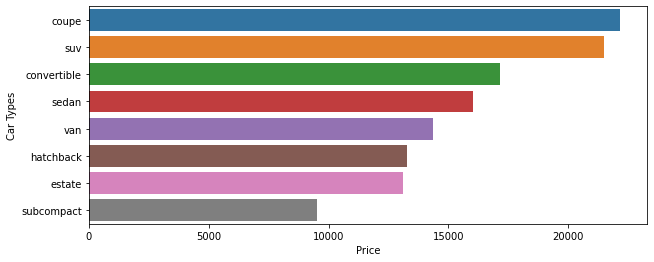

In [43]:
car_type = []
for each in bmw.car_type.unique():
    x = bmw[bmw.car_type==each]
    car_type.append(np.mean(x['price']))
    
x = pd.concat([pd.DataFrame(bmw.car_type.unique(), columns=['Key']), pd.DataFrame(car_type,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,4))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Price')
plt.ylabel('Car Types')
plt.show()

In [44]:
bmw['car_type'] = bmw.car_type.apply(lambda x : 1 if x == 'subcompact' else (
2 if x == 'estate' else (
3 if x == 'hatchback' else (
4 if x == 'van' else (
5 if x == 'sedan' else (
6 if x == 'convertible' else (
7 if x == 'suv' else 8)))))))

### 6. Boolean features

In [45]:
bool_features = bmw.select_dtypes('boolean').columns

for col in bool_features:
    bmw[col] = bmw[col].apply(lambda x: 1 if x==True else 0)

In [46]:
bmw['model_key'] = bmw.model_key.apply(lambda x : 7 if x == 'i8' else (
6 if x == 'M4' else (
5 if x == 'X6 M' else (
4 if x == 'X5 M50' else (
1 if x in ('735', '216', '523', '650', '123', 'Z4', '118', '116', '316',
       '630', '318', '114', '220 Active Tourer', '320', '120', '125',
       '216 Active Tourer', 'X1') else (
2 if x in ( '325', '318 Gran Turismo', '525',
       '218 Active Tourer', '520', '218 Gran Tourer', '518', '328', '330',
       '216 Gran Tourer', '218', '320 Gran Turismo', '214 Gran Tourer',
       'X3', '225', '225 Active Tourer', '635', '530', '520 Gran Turismo',
       '528', '325 Gran Turismo', '418 Gran Coupé', '530 Gran Turismo',
       'ActiveHybrid 5', 'i3', '335', '135') else (
3)))))))

In [47]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age,model_key_mileage_rel
0,BMW,1,140411,100,2,3,6,1,1,0,...,0,11300,1,2,2012,1,1,2018,2191,3
1,BMW,6,13929,317,1,3,6,1,1,0,...,1,69700,1,4,2016,1,2,2018,729,1
2,BMW,1,183297,120,2,4,6,0,0,0,...,0,10200,1,4,2012,1,2,2018,2190,3
3,BMW,3,128035,135,2,3,6,1,1,0,...,1,25100,1,7,2014,1,2,2018,1456,1
4,BMW,3,97097,160,2,2,6,1,1,0,...,1,33400,1,12,2014,1,4,2018,1453,1


In [48]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age,model_key_mileage_rel
0,BMW,1,140411,100,2,3,6,1,1,0,...,0,11300,1,2,2012,1,1,2018,2191,3
1,BMW,6,13929,317,1,3,6,1,1,0,...,1,69700,1,4,2016,1,2,2018,729,1
2,BMW,1,183297,120,2,4,6,0,0,0,...,0,10200,1,4,2012,1,2,2018,2190,3
3,BMW,3,128035,135,2,3,6,1,1,0,...,1,25100,1,7,2014,1,2,2018,1456,1
4,BMW,3,97097,160,2,2,6,1,1,0,...,1,33400,1,12,2014,1,4,2018,1453,1


In [49]:
bmw.select_dtypes('object').columns

Index(['maker_key'], dtype='object')

## Preprocessing for mileage and horsepower

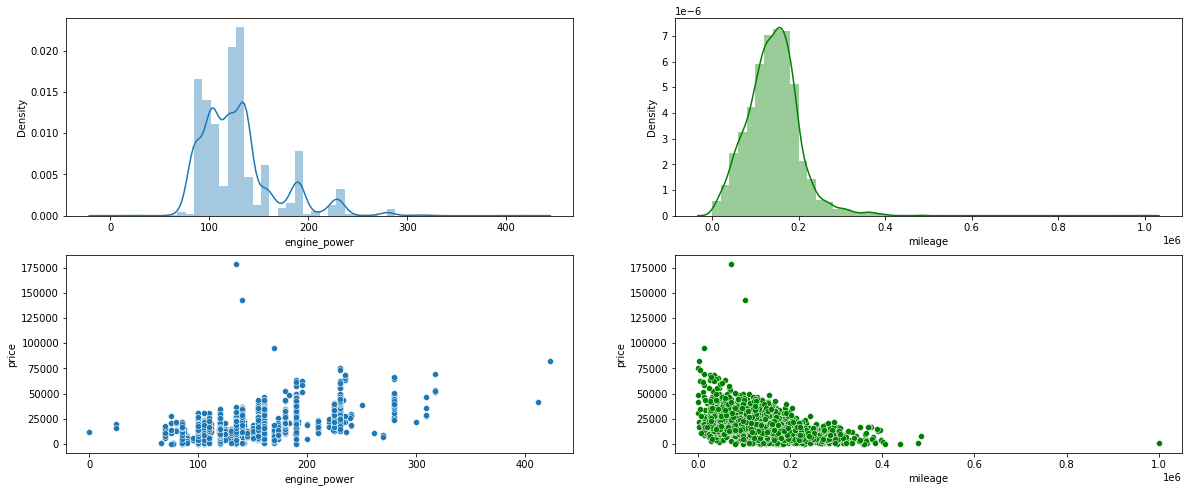

In [50]:
fig, ax = plt.subplots(2,2,figsize = (20,8))
sns.distplot(bmw.engine_power, ax = ax[0,0])
sns.distplot(bmw.mileage, ax = ax[0,1], color = 'green')
sns.scatterplot(bmw.mileage, bmw.price , ax = ax[1,1],color = 'green')
sns.scatterplot(bmw.engine_power, bmw.price , ax = ax[1,0])
plt.show()

In [51]:
bmw[bmw.engine_power==bmw.engine_power.min()] 

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age,model_key_mileage_rel
3765,BMW,1,81770,0,2,4,7,0,0,0,...,0,11700,1,10,2014,1,3,2018,1454,2


In [52]:
bmw.shape

(4843, 24)

In [53]:
bmw.drop(bmw[bmw.engine_power==0].index, axis=0,inplace=True)

In [54]:
bmw.shape

(4842, 24)

In [55]:
bmw[(bmw.engine_power<0)|(bmw.engine_power==0)] 

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age,model_key_mileage_rel


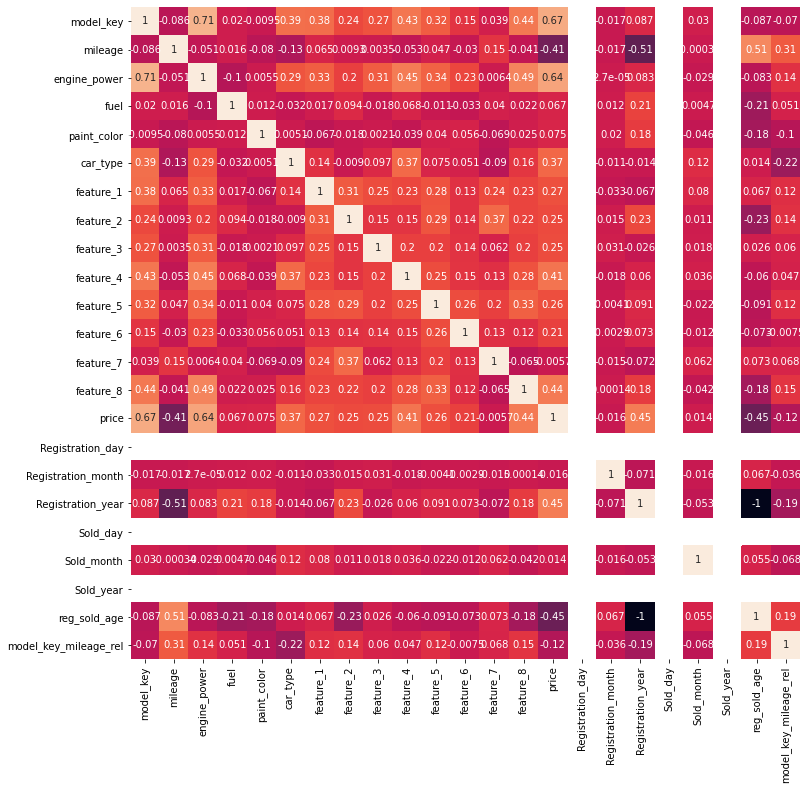

In [56]:
#This has to be done at the end after encoding step
plt.figure(figsize=(12,12))
sns.heatmap(bmw.corr(), cbar=False, annot=True)
plt.show()

In [57]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'price', 'Registration_day', 'Registration_month', 'Registration_year',
       'Sold_day', 'Sold_month', 'Sold_year', 'reg_sold_age',
       'model_key_mileage_rel'],
      dtype='object')

In [58]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'price', 'Registration_day', 'Registration_month', 'Registration_year',
       'Sold_day', 'Sold_month', 'Sold_year', 'reg_sold_age',
       'model_key_mileage_rel'],
      dtype='object')

In [59]:
bmw.head()

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,feature_8,price,Registration_day,Registration_month,Registration_year,Sold_day,Sold_month,Sold_year,reg_sold_age,model_key_mileage_rel
0,BMW,1,140411,100,2,3,6,1,1,0,...,0,11300,1,2,2012,1,1,2018,2191,3
1,BMW,6,13929,317,1,3,6,1,1,0,...,1,69700,1,4,2016,1,2,2018,729,1
2,BMW,1,183297,120,2,4,6,0,0,0,...,0,10200,1,4,2012,1,2,2018,2190,3
3,BMW,3,128035,135,2,3,6,1,1,0,...,1,25100,1,7,2014,1,2,2018,1456,1
4,BMW,3,97097,160,2,2,6,1,1,0,...,1,33400,1,12,2014,1,4,2018,1453,1


In [60]:
X = bmw.drop(['maker_key','price'], axis=1)
Y = bmw.price

In [61]:
print(X.shape)
print(Y.shape)

(4842, 22)
(4842,)


## Feature Importance using ExtraTreeRegressor

In [62]:
extra_trees = ExtraTreesRegressor()
extra_trees.fit(X,Y)

ExtraTreesRegressor()

In [63]:
extra_trees.feature_importances_

array([0.25169656, 0.07385131, 0.12381433, 0.00382411, 0.00703212,
       0.03193143, 0.01344114, 0.01008886, 0.01302329, 0.03494351,
       0.01927838, 0.00917951, 0.01032172, 0.12685719, 0.        ,
       0.01350648, 0.10007075, 0.        , 0.0154263 , 0.        ,
       0.11962963, 0.02208339])

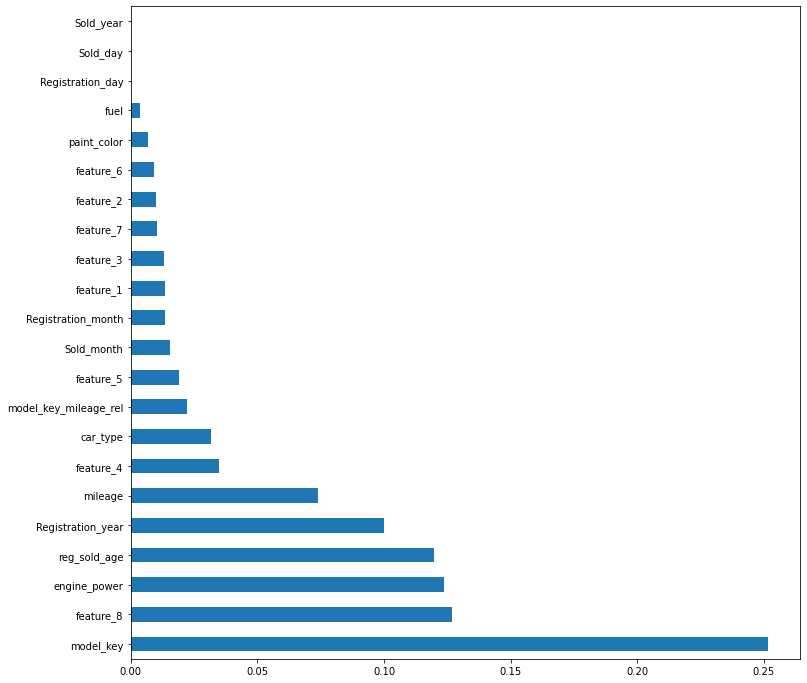

In [64]:
plt.figure(figsize=(12,12))
feature_importances = pd.Series(extra_trees.feature_importances_, index= X.columns)
feature_importances.nlargest(30).plot(kind='barh')
plt.show()

In [65]:
# These are of no imoprtance, hence dropping them.
bmw.drop(['Registration_day', 'Sold_day','Sold_year'], axis=1, inplace=True)

In [66]:
X = bmw.drop(['maker_key','price'], axis=1)
Y = bmw.price
print(X.shape)
print(Y.shape)

(4842, 19)
(4842,)


## Splitting the data

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=39)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3873, 19)
(3873,)
(969, 19)
(969,)


# 1. Random Forest

In [307]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluation

In [308]:
y_pred = random_forest_reg.predict(x_test)
print('R-squared value on Training data- ',random_forest_reg.score(x_train, y_train))
print('R-squared value on Testing data- ',random_forest_reg.score(x_test, y_test))

R-squared value on Training data-  0.9658858901511367
R-squared value on Testing data-  0.8294265132826786


In [316]:
print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, random_forest_reg.predict(x_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, random_forest_reg.predict(x_test))))

Train mean_squared_log_error 0.037968539858456676
Test mean_squared_log_error 0.15607253008629465


In [312]:
print(f"MAE - {mean_absolute_error(y_test,y_pred)}")
print(f"MSE - {mean_squared_error(y_test,y_pred)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred))}")

MAE - 2041.561403508772
MSE - 12666910.126934985
RMSE - 3559.060287061036


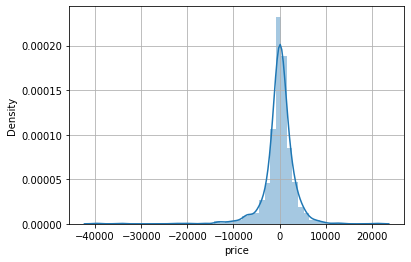

In [317]:
sns.distplot(y_test-y_pred)
plt.grid()
plt.show()

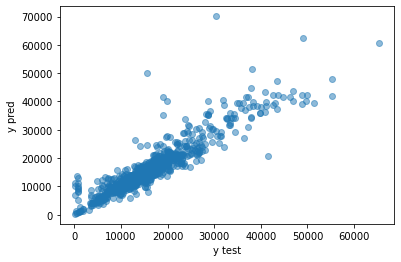

In [318]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

## Hyperparameter Tuning

In [320]:
#No of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1300, num=13)]

#Number of features to consider at every split
max_features = ['auto','sqrt','log2']

#Maximum no.of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=7)]

#minimum no.of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum no.of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [321]:
random_grid = {
                'n_estimators' : n_estimators,
                 'max_features' : max_features,
                 'max_depth':max_depth,
                 'min_samples_leaf' : min_samples_leaf,
                 'min_samples_split' : min_samples_split
                }

In [324]:
random_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10,cv=5, verbose= 2 ,random_state=12)

In [325]:
random_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   1.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=9, total=   2.0s
[CV] n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=21 
[CV]  n_estimators=1100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=21, total=   5.3s
[CV] n_estimators=1100, min_samples_split

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   1.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=21, total=   2.0s
[CV] n_estimators=700, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=12, scoring='r2', verbose=2)

In [326]:
random_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 21}

In [327]:
random_rf.best_score_

0.7861131580178623

In [328]:
prediction_y = random_rf.predict(x_test)

In [331]:
y_pred = random_rf.predict(x_test)
print('R-squared value on Training data- ',random_rf.score(x_train, y_train))
print('R-squared value on Testing data- ',random_rf.score(x_test, y_test))

R-squared value on Training data-  0.9010094178967637
R-squared value on Testing data-  0.8915406612943702


In [332]:
print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, random_rf.predict(x_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, random_rf.predict(x_test))))

Train mean_squared_log_error 0.07025157603006149
Test mean_squared_log_error 0.1662102195408007


In [333]:
print(f"MAE - {mean_absolute_error(y_test,y_pred)}")
print(f"MSE - {mean_squared_error(y_test,y_pred)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred))}")

MAE - 1795.900265310157
MSE - 8054268.704067612
RMSE - 2838.004352369392


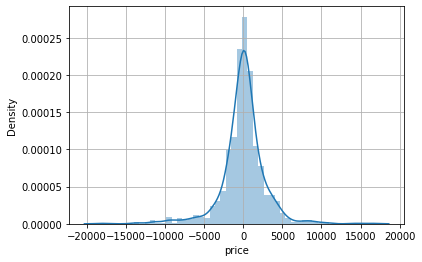

In [334]:
sns.distplot(y_test-prediction_y)
plt.grid()

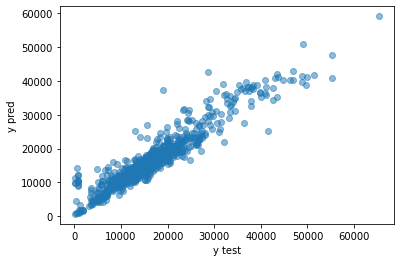

In [335]:
plt.scatter(y_test,prediction_y, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

## Saving the model

In [337]:
model_file = open('final_rf.pkl','wb')
pickle.dump(random_rf, model_file)
model_file.close()

# 2. XGBoost

In [343]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Model Evaluation

In [348]:
y_pred = xgb_regressor.predict(x_test)
print('R-squared value on Training data- ',xgb_regressor.score(x_train, y_train))
print('R-squared value on Testing data- ',xgb_regressor.score(x_test, y_test))
print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, xgb_regressor.predict(x_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, xgb_regressor.predict(x_test))))
print(f"MAE - {mean_absolute_error(y_test,y_pred)}")
print(f"MSE - {mean_squared_error(y_test,y_pred)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred))}")

R-squared value on Training data-  0.9868419422792881
R-squared value on Testing data-  0.799036581963217
Train mean_squared_log_error 0.03610907403352006
Test mean_squared_log_error 0.1629207229615374
MAE - 2177.9497191249034
MSE - 14923688.341390368
RMSE - 3863.1189913579374


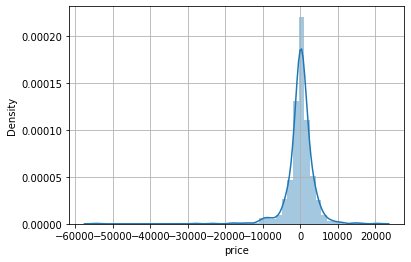

In [349]:
sns.distplot(y_test-y_pred)
plt.grid()

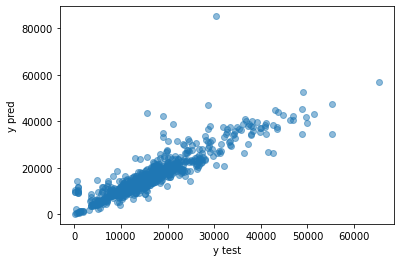

In [350]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

# 3. SVR


In [66]:
svr_regressor = SVR()
svr_regressor.fit(x_train, y_train)

SVR()

In [69]:
y_pred_svr = svr_regressor.predict(x_test)
print('R-squared value on Training data- ',svr_regressor.score(x_train, y_train))
print('R-squared value on Testing data- ',svr_regressor.score(x_test, y_test))

print('MSLE - ',svr_regressor.score(x_test, y_test))
print(f"MAE - {mean_absolute_error(y_test,y_pred_svr)}")
print(f"MSE - {mean_squared_error(y_test,y_pred_svr)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred_svr))}")

R-squared value on Training data-  -0.018898214871186925
R-squared value on Testing data-  -0.03362851931522126
MSLE -  -0.03362851931522126
MAE - 5858.182676225754
MSE - 76757999.21063128
RMSE - 8761.164261137403


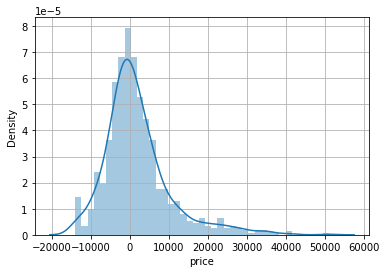

In [70]:
sns.distplot(y_test-y_pred_svr)
plt.grid()

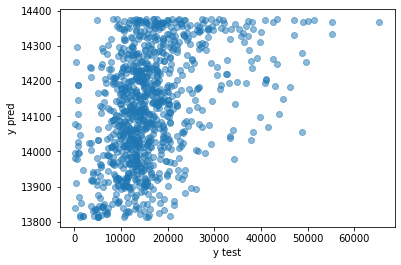

In [71]:
plt.scatter(y_test,y_pred_svr, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

# 4. Linear Regression

In [68]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred_lr = linear_reg.predict(x_test)
print('R-squared value on Training data- ',linear_reg.score(x_train, y_train))
print('R-squared value on Testing data- ',linear_reg.score(x_test, y_test))

print('MSLE - ',linear_reg.score(x_test, y_test))
print(f"MAE - {mean_absolute_error(y_test,y_pred_lr)}")
print(f"MSE - {mean_squared_error(y_test,y_pred_lr)}")
print(f"RMSE - {sqrt(mean_squared_error(y_test,y_pred_lr))}")

R-squared value on Training data-  0.6945403866380898
R-squared value on Testing data-  0.7928090009936797
MSLE -  0.7928090009936797
MAE - 2674.157247247188
MSE - 15386152.99499781
RMSE - 3922.518705500053


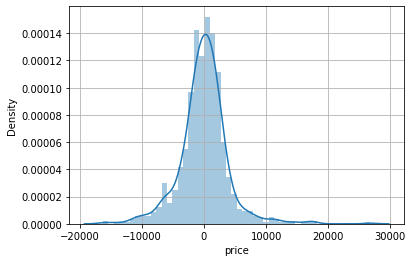

In [70]:
sns.distplot(y_test-y_pred_lr)
plt.grid()

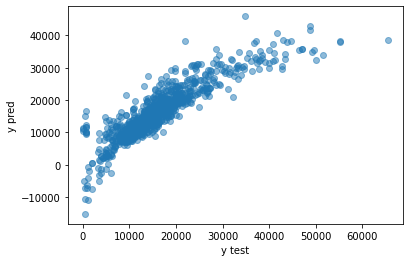

In [71]:
plt.scatter(y_test,y_pred_lr, alpha=0.5)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()